<a href="https://colab.research.google.com/github/SourasishBasu/python-data-analytics/blob/main/Book_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Book

In [ ]:
import re

In [ ]:
with open('miracle_in_the_andes.txt', "r") as f:
  book = f.read()

In [ ]:
type(book)

str

# Couting the Number of Chapters

### with string methods

In [ ]:
book.count("Chapter")

11

### with regex



In [ ]:
pattern = re.compile("Chapter [0-9]+") # + checks for 1 or more numbers after the first digit
findings = re.findall(pattern, book)
findings

['Chapter 1',
 'Chapter 2',
 'Chapter 3',
 'Chapter 4',
 'Chapter 5',
 'Chapter 6',
 'Chapter 7',
 'Chapter 8',
 'Chapter 9',
 'Chapter 10']

In [ ]:
len(findings)

10

# Extracting Chapter Titles

In [ ]:
pattern = re.compile("([a-zA-Z ]+)\n\n")
re.findall(pattern, book)

['Before',
 'Everything Precious',
 'A Promise',
 'Breathe Once More',
 'Abandoned',
 'Tomb',
 'East',
 'The Opposite of Death',
 'I See a Man',
 'After']

# Extracting Paragraphs with the word "love" in them

In [ ]:
pattern = re.compile("[^\n]+love[^\n]+")
paras = re.findall(pattern, book)
paras[0]

'To me, this is the essence of rugby. No other sport gives you such an intense sense of selflessness and unified purpose. I believe this is why rugby players all over the world feel such a passion for the game and such a feeling of brotherhood. As a young man, of course, I could not put these things into words, but I knew, and my teammates knew, that there was something special about the game, and under the guidance of the Christian Brothers we developed a passionate love for the sport that shaped our friendships and our lives. For eight years we played our hearts out for the Christian Brothers—a brotherhood of young boys with Latin names, playing a game with deep Anglo roots under Uruguay’s sunny skies, and proudly wearing the bright green shamrock on our uniforms. The game became so much a part of our lives, in fact, that when we graduated from Stella Maris at the age of sixteen, many of us could not bear the thought that our playing days were over. Our salvation came in the form of 

# Extracting sentences which have the word "love" in it.

In [ ]:
pattern = re.compile("[A-Z]{1}[^.]*[^a-zA-Z]+love[^a-zA-Z]+[^.]*.")

'''
* - 0 or more
{} - exactly 1
^ - negation
+ - 1 or more (at least 1)
'''

findings = re.findall(pattern, book)
findings[:3]

['As a young man, of course, I could not put these things into words, but I knew, and my teammates knew, that there was something special about the game, and under the guidance of the Christian Brothers we developed a passionate love for the sport that shaped our friendships and our lives.',
 'Guido and I grew up together, playing soccer and sharing a love of motorcycles, cars, and auto racing.',
 'Under the guidance of the Christian Brothers, both of us grew to love the game of rugby with a consuming passion.']

In [ ]:
len(findings)

67

# Finding out the word with highest occurence

In [ ]:
pattern = re.compile("[a-zA-Z]+")
findings = re.findall(pattern, book.lower())

In [ ]:
len(findings)

86798

In [ ]:
from collections import Counter
word_dict = Counter(findings) # Dictionary of word occurences

In [ ]:
def word_count_finder(word):
  if word in word_dict.keys():
    return word_dict[word]
  else:
    return f"The book doesn't contain the word '{word}'."

word_count_finder("a")

1566


In [ ]:
wordlist = [{val: key} for (key, val) in word_dict.items()] # Creating {count: word} pairs from word dict into a list for sorting

wordlist = sorted(wordlist, key=lambda x: list(x.keys()), reverse=True) # Sorting dict into a list on the basis of occurence count in descending order

wordlist[0]

{5346: 'the'}

# Using `ntlk` library for improved sentiment analysis

In [ ]:
from platform import python_version
python_version()

'3.10.12'

In [ ]:
!pip3.10 install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

eng_stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
eng_stop[:5]

['i', 'me', 'my', 'myself', 'we']

## Filtering out Non-Stopwords

In [ ]:
wordlist[:10]

[{5346: 'the'},
 {2795: 'and'},
 {2729: 'i'},
 {2400: 'to'},
 {2060: 'of'},
 {1566: 'a'},
 {1430: 'was'},
 {1419: 'in'},
 {1226: 'we'},
 {1169: 'my'}]

In [ ]:
filter = []
for i in wordlist:
  if list(i.values())[0] not in eng_stop: # Checking for stopwords from existing list from nltk
    info1 = list(i.items())[0][::-1]
    filter.append(info1)

In [ ]:
filter[:10]

[('would', 575),
 ('us', 519),
 ('said', 292),
 ('roberto', 284),
 ('could', 252),
 ('one', 249),
 ('snow', 227),
 ('mountain', 183),
 ('time', 182),
 ('like', 165)]

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer() #Initializig SentimentAnalyzer object

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Assessing Overall Book Sentiment

In [ ]:
analyzer.polarity_scores(book)

{'neg': 0.116, 'neu': 0.76, 'pos': 0.125, 'compound': 1.0}

# Analyzing Chapterwise sentiment

In [ ]:
pattern = re.compile("Chapter [0-9]+")
chapters = re.split(pattern, book)[1:] # Splitting book into chapter using regex for simplified understanding

In [ ]:
pos, neg = [], []
index = [x for x in range(1, 11)]

# Calculating and storing positive and negative sentiment scores from each chapter
for chapter in chapters:
  score = analyzer.polarity_scores(chapter)
  pos.append(score['pos'])
  neg.append(score['neg'])

print(pos)
print(neg)

[0.16, 0.154, 0.105, 0.138, 0.141, 0.115, 0.103, 0.094, 0.079, 0.181]
[0.061, 0.12, 0.145, 0.141, 0.118, 0.124, 0.136, 0.12, 0.097, 0.086]


## Plotting Graph for Negative vs Positive Sentiment

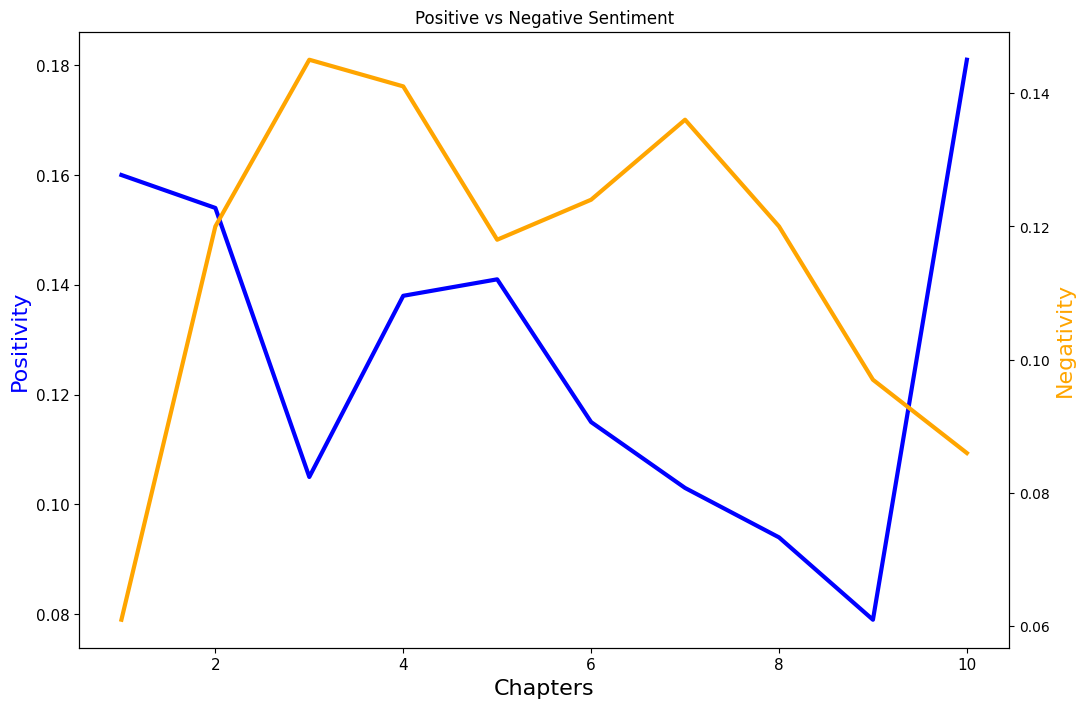

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Positive vs Negative Sentiment")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Chapters', fontsize = 16)
ax1.set_ylabel('Positivity', color = "blue", fontsize=16)
ax2.set_ylabel('Negativity', color = 'orange', fontsize=16)

ax1.plot(index[:], pos[:], color='b', linewidth=3)
ax2.plot(index[:], neg[:], color='orange', linewidth=3)
